## DATA PREPROCESSING

#### Importing Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL as p

### GETTING DATA

In [119]:
print(f'Working Directory: {os.getcwd()}')

Working Directory: /teamspace/studios/this_studio/Preprocessing Eflow Images


Reading data from csv files

In [120]:
# signal_dir = '/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset1/signal.txt'
# background_dir = '/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset1/background.txt'
signal_dir = '/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/sig_btagged2jets.txt'
background_dir = '/teamspace/studios/this_studio/Preprocessing Eflow Images/data/dataset3/bg_btagged2jets.txt'

signal = pd.read_csv(signal_dir, sep = '\t')
background = pd.read_csv(background_dir, sep = '\t')

Data shapes:

In [121]:
print("Signal: ", signal.shape)
print("Background: ", background.shape)

Signal:  (886, 80)
Background:  (1529, 66)


In [122]:
signal.head()

,eventno,jetmultiplicity,axion_Eta,axion_Phi,axion_pT,axion_Px,axion_Py,axion_Pz,axion_E,Z_Eta,...,isophoton_Pz,isophoton_E,jet1_btag,jet2_btag,jet3_btag,jet4_btag,invmass_2j1p,delta_eta_jet1_jet2,delta_phi_jet1_jet2,deltaR_jet1_jet2
0,228,2,-0.034237,-0.864124,44.4921,28.8890,-33.8375,-1.52359,63.3008,0.626346,...,8.15751,38.6899,1,1,0,0,90.217625,0.100643,1.524951,1.528268
1,436,2,1.385930,0.331321,34.5022,32.6258,11.2233,64.66500,85.9530,4.751210,...,43.61580,55.1083,1,1,0,0,86.379330,0.611792,-1.761031,1.864275
2,541,2,-0.961386,-0.893333,31.1332,19.5149,-24.2579,-34.75960,64.8188,-2.760710,...,-51.77440,63.3654,1,1,0,0,104.956134,-0.172527,1.894769,1.902607
3,697,2,-0.682404,-2.496180,35.2896,-28.1911,-21.2278,-25.99480,62.8182,-2.181670,...,-76.57120,77.9121,1,1,0,0,89.161722,-0.891442,1.682195,1.903799
4,1344,2,2.551010,-2.732630,31.3965,-28.8073,-12.4849,200.02700,207.4140,3.803630,...,34.83620,45.8901,1,1,0,0,96.848533,-0.397550,1.805895,1.849136


In [123]:
background.head()

,eventno,jetmultiplicity,highb_Eta,highb_Phi,highb_pT,highb_Px,highb_Py,highb_Pz,highb_E,lowb_Eta,...,isophoton_Pz,isophoton_E,jet1_btag,jet2_btag,jet3_btag,jet4_btag,invmass_2j1p,delta_eta_jet1_jet2,delta_phi_jet1_jet2,deltaR_jet1_jet2
0,469,2,1.48287,-2.25975,62.3178,-39.61750,-48.1037,130.2000,144.4220,1.133370,...,26.46580,32.6154,1,1,0,0,123.591138,-0.635360,2.935927,3.003889
1,526,2,1.64302,-1.15828,38.4289,15.40680,-35.2053,95.6378,103.1770,0.426798,...,3.68089,23.5027,1,1,0,0,96.376281,-0.693470,3.097550,3.174227
2,726,2,-1.79772,1.75038,51.7442,-9.24244,50.9121,-151.8740,160.5160,-1.252300,...,9.19068,21.3895,1,1,0,0,126.535614,-0.502780,3.008840,3.050558
3,842,2,-0.66291,-1.45064,40.6174,4.86878,-40.3245,-28.9416,50.0947,1.388540,...,-34.78410,51.5926,1,1,0,0,146.501946,-1.896925,2.284735,2.969569
4,1087,4,-1.29616,-1.07354,72.9167,34.78250,-64.0861,-123.2900,143.3150,0.032449,...,-8.16639,13.9744,1,1,0,0,151.961820,-1.323023,-2.896820,3.184644


Extracting required columns

In [124]:
column_name = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta', 'jet2_Phi']
signal = signal[column_name]
background = background[column_name]

In [125]:
signal.head()

,isophoton_Eta,isophoton_Phi,jet1_Eta,jet1_Phi,jet2_Eta,jet2_Phi
0,0.214053,2.494540,-0.014393,-0.208869,-0.115036,-1.73382
1,1.075320,-2.772420,1.303590,-0.449611,0.691798,1.31142
2,-1.147960,2.543960,-0.787717,0.477499,-0.615190,-1.41727
3,-2.373360,1.110120,-0.952813,2.817070,-0.061371,-1.78392
4,0.994138,0.083512,1.871150,2.811970,2.268700,-1.66532


In [126]:
background.head()

,isophoton_Eta,isophoton_Phi,jet1_Eta,jet1_Phi,jet2_Eta,jet2_Phi
0,1.131260,-0.431804,1.114290,0.962557,1.749650,-1.97337
1,0.157915,1.442390,0.607610,2.005310,1.301080,-1.09224
2,0.459507,-1.404830,-1.826390,1.720420,-1.323610,-1.28842
3,-0.818417,1.356740,-0.539605,-1.430820,1.357320,2.56763
4,-0.669095,-2.797650,-1.371900,-1.085670,-0.048877,1.81115


### DEFINING SOME USEFUL FUNCTIONS

Function to plot a single row of dataframe: i.e. 3 data points for isophoton, jet1, jet2 

In [127]:
def plot_eflow_objects(x,*,title:str = 'Plot'):
    plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
    plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
    
    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.xlim([-7,7])
    plt.ylim([-7,7]) 
    plt.scatter(x.loc['isophoton_Eta'], x.loc['isophoton_Phi'], label = 'Isophoton')
    plt.scatter(x.loc['jet1_Eta'], x.loc['jet1_Phi'], label = 'Jet1')
    plt.scatter(x.loc['jet2_Eta'], x.loc['jet2_Phi'], label = 'Jet2')
    plt.title(title)
    plt.xlabel("Eta")
    plt.ylabel("Phi")
    plt.legend()
    plt.show() 

Function to shift the coordinates for each row so that isophoton lies on origin

In [128]:
def shift_origin(x:pd.DataFrame) -> pd.DataFrame:
    #TODO: Take coordinates and subtract origin coordinates from it.
    # 1. Storing isophoton coordinates as origin
    origin = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values

    # 2. Subtracting origin from cooridnates of isophoton, jet1, jet2
    isophoton_shift_coor = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values - origin
    jet1_shift_coor = x.loc[:,['jet1_Eta', 'jet1_Phi']].values - origin
    jet2_shift_corr = x.loc[:,['jet2_Eta', 'jet2_Phi']].values - origin

    # Returning a new dataframe after concatenating updated coordinates
    return pd.DataFrame(np.concatenate([isophoton_shift_coor, jet1_shift_coor, jet2_shift_corr], axis = 1), columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta', 'jet2_Phi'])

Function to rotate the coordinates around origin such that jet1 lies on y-axis below the origin and jet2 is rotated accordingly.

In [129]:
def rotate_coordinates(x:pd.DataFrame) -> pd.DataFrame:
    #TODO: Rotate the plane such that Jet1 lies below isophoton(origin)
    y_axis = 0,-1 # -Y axis
    rotated_coordinates = pd.DataFrame(x[['isophoton_Eta', 'isophoton_Phi']])
    jet1_rotated = []
    jet2_rotated = []
    # Loop for rotating each row by the corresponding theta
    for i in range(len(x)):
        row = x.iloc[i]
        # calculating theta using dot product between jet1 vector and -Y axis
        theta = np.arccos(np.dot(row.loc[['jet1_Eta', 'jet1_Phi']].values, y_axis)/np.linalg.norm(row.loc[['jet1_Eta', 'jet1_Phi']]))
        if row.loc['jet1_Eta'] < 0:
            theta = -theta
        # Rotation matrix that rotates clockwise by theta
        rotation_matrix = np.array([
        [np.cos(-theta), -np.sin(-theta)],
        [np.sin(-theta),  np.cos(-theta)]
        ])
        # Operating rotation matrix on jet1 and jet2
        jet1_rotated.append((rotation_matrix @ (row.loc[['jet1_Eta', 'jet1_Phi']].values).T).T)
        jet2_rotated.append((rotation_matrix @ (row.loc[['jet2_Eta', 'jet2_Phi']].values).T).T)
        
    jet1_rotated = np.array(jet1_rotated) # list to array
    jet2_rotated = np.array(jet2_rotated)
    # Storing the rotated data as columns of a new dataframe
    rotated_coordinates['jet1_Eta'] = jet1_rotated[:,0]
    rotated_coordinates['jet1_Phi'] = jet1_rotated[:,1]
    rotated_coordinates['jet2_Eta'] = jet2_rotated[:,0]
    rotated_coordinates['jet2_Phi'] = jet2_rotated[:,1]

    return rotated_coordinates

Function for preprocessing the data: shift and rotate

In [130]:
def preprocess(x:pd.DataFrame) -> pd.DataFrame:
    #TODO: 1. Shift Origin to location of Isophoton
    # 2. Rotate the plane such that Jet1 lies below isophoton(origin)
    shifted = shift_origin(x)
    rotated = rotate_coordinates(shifted)
    return rotated

### PREPROCESSING THE DATA USING DEFINED FUNCTIONS

#### FOR SIGNAL

In [131]:
index = 1

In [132]:
signal_shifted = shift_origin(signal)
signal_transformed = preprocess(signal)

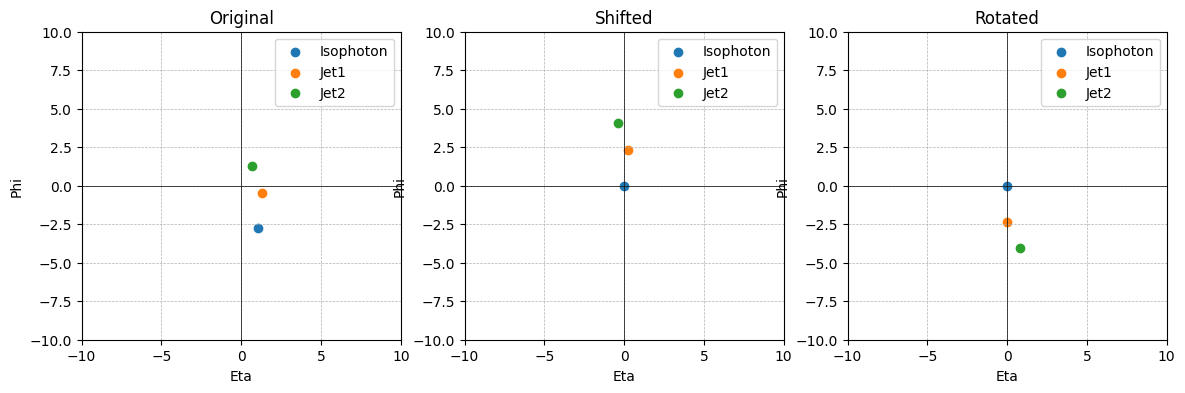

In [133]:
plt.figure(figsize = (14,4))

plt.subplot(1,3,1)
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(signal.loc[index,'isophoton_Eta'], signal.loc[index,'isophoton_Phi'], label = 'Isophoton')
plt.scatter(signal.loc[index,'jet1_Eta'], signal.loc[index,'jet1_Phi'], label = 'Jet1')
plt.scatter(signal.loc[index,'jet2_Eta'], signal.loc[index,'jet2_Phi'], label = 'Jet2')
plt.title("Original")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.legend()

plt.subplot(1,3,2)
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(signal_shifted.loc[index,'isophoton_Eta'], signal_shifted.loc[index,'isophoton_Phi'], label = 'Isophoton')
plt.scatter(signal_shifted.loc[index,'jet1_Eta'], signal_shifted.loc[index,'jet1_Phi'], label = 'Jet1')
plt.scatter(signal_shifted.loc[index,'jet2_Eta'], signal_shifted.loc[index,'jet2_Phi'], label = 'Jet2')
plt.title("Shifted")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.legend()

plt.subplot(1,3,3)
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.scatter(signal_transformed.loc[index,'isophoton_Eta'], signal_transformed.loc[index,'isophoton_Phi'], label = 'Isophoton')
plt.scatter(signal_transformed.loc[index,'jet1_Eta'], signal_transformed.loc[index,'jet1_Phi'], label = 'Jet1')
plt.scatter(signal_transformed.loc[index,'jet2_Eta'], signal_transformed.loc[index,'jet2_Phi'], label = 'Jet2')
plt.title("Rotated")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.legend()

Plotting for first few data points 

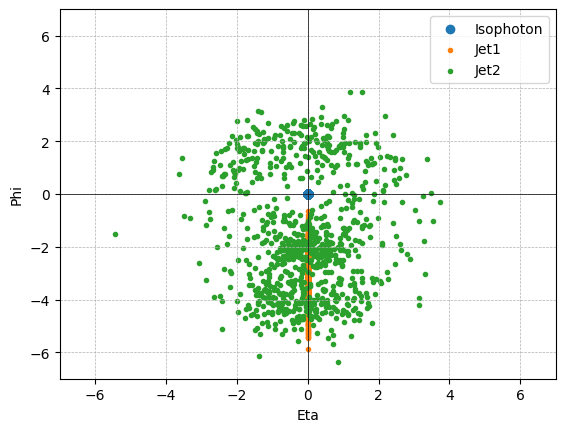

In [134]:
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
    
# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

x = signal_transformed
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.scatter(x.loc[:,'isophoton_Eta'], x.loc[:,'isophoton_Phi'], label = 'Isophoton')
plt.scatter(x.loc[:,'jet1_Eta'], x.loc[:,'jet1_Phi'], label = 'Jet1', marker='.')
plt.scatter(x.loc[:,'jet2_Eta'], x.loc[:,'jet2_Phi'], label = 'Jet2', marker='.')
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.legend()
plt.show() 

#### FOR BACKGROUND

In [135]:
index = 1

In [136]:
background_shifted = shift_origin(background)
background_transformed = preprocess(background)

PLOTTING FOR WHOLE DATASET

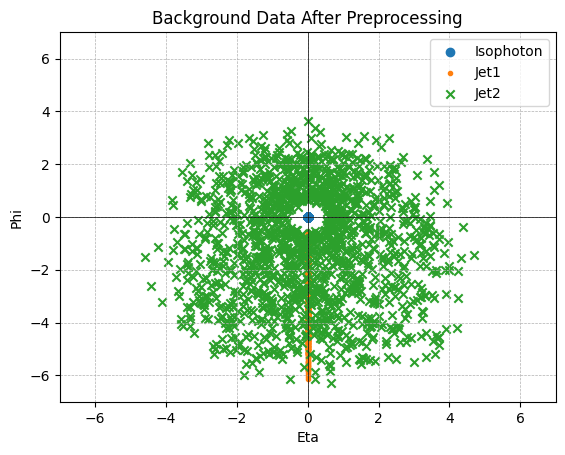

In [137]:
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
    
# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

x = background_transformed
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.scatter(x.loc[:,'isophoton_Eta'], x.loc[:,'isophoton_Phi'], label = 'Isophoton')
plt.scatter(x.loc[:,'jet1_Eta'], x.loc[:,'jet1_Phi'], label = 'Jet1', marker='.')
plt.scatter(x.loc[:,'jet2_Eta'], x.loc[:,'jet2_Phi'], label = 'Jet2', marker='x')
plt.title("Background Data After Preprocessing")
plt.xlabel("Eta")
plt.ylabel("Phi")
plt.legend()
plt.show()  

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class preprocessData():
    '''
    columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi','jet2_Eta', 'jet2_Phi']
    '''
    def __init__(self):
        pass

    def shift_origin(self,x:pd.DataFrame) -> pd.DataFrame:
        #TODO: Take coordinates and subtract origin coordinates from it.
        # 1. Storing isophoton coordinates as origin
        origin = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values
    
        # 2. Subtracting origin from cooridnates of isophoton, jet1, jet2
        isophoton_shift_coor = x.loc[:,['isophoton_Eta', 'isophoton_Phi']].values - origin
        jet1_shift_coor = x.loc[:,['jet1_Eta', 'jet1_Phi']].values - origin
        jet2_shift_corr = x.loc[:,['jet2_Eta', 'jet2_Phi']].values - origin
    
        # Returning a new dataframe after concatenating updated coordinates
        return pd.DataFrame(np.concatenate([isophoton_shift_coor, jet1_shift_coor, jet2_shift_corr], axis = 1), columns = ['isophoton_Eta', 'isophoton_Phi', 'jet1_Eta', 'jet1_Phi', 'jet2_Eta', 'jet2_Phi'])

    def rotate_coordinates(self,x:pd.DataFrame) -> pd.DataFrame:
        #TODO: Rotate the plane such that Jet1 lies below isophoton(origin)
        y_axis = 0,-1 # -Y axis
        rotated_coordinates = pd.DataFrame(x[['isophoton_Eta', 'isophoton_Phi']])
        jet1_rotated = []
        jet2_rotated = []
        # Loop for rotating each row by the corresponding theta
        for i in range(len(x)):
            row = x.iloc[i]
            # calculating theta using dot product between jet1 vector and -Y axis
            theta = np.arccos(np.dot(row.loc[['jet1_Eta', 'jet1_Phi']].values, y_axis)/np.linalg.norm(row.loc[['jet1_Eta', 'jet1_Phi']]))
            if row.loc['jet1_Eta'] < 0:
                theta = -theta
            # Rotation matrix that rotates clockwise by theta
            rotation_matrix = np.array([
            [np.cos(-theta), -np.sin(-theta)],
            [np.sin(-theta),  np.cos(-theta)]
            ])
            # Operating rotation matrix on jet1 and jet2
            jet1_rotated.append((rotation_matrix @ (row.loc[['jet1_Eta', 'jet1_Phi']].values).T).T)
            jet2_rotated.append((rotation_matrix @ (row.loc[['jet2_Eta', 'jet2_Phi']].values).T).T)
            
        jet1_rotated = np.array(jet1_rotated) # list to array
        jet2_rotated = np.array(jet2_rotated)
        # Storing the rotated data as columns of a new dataframe
        rotated_coordinates['jet1_Eta'] = jet1_rotated[:,0]
        rotated_coordinates['jet1_Phi'] = jet1_rotated[:,1]
        rotated_coordinates['jet2_Eta'] = jet2_rotated[:,0]
        rotated_coordinates['jet2_Phi'] = jet2_rotated[:,1]
    
        return rotated_coordinates

    def bound_phi(self, x:pd.DataFrame) -> pd.DataFrame:
        '''
        Normalize angles to the range (-π, π)

        This function takes angular values in any range and normalizes them to lie 
        within (-π, π) using the following steps:
        
        1. Transform negative angles to positive:
           - Add 2π to negative angles to get angles in range (0, 2π)
           
        2. Map angles larger than π to their equivalent in (-π, 0):
           - For angles > π: result = -(2π - angle)
        '''
        jet1_phi = x['jet1_Phi'].values
        jet2_phi = x['jet2_Phi'].values
        isophoton_phi = x['isophoton_Phi'].values

        updated_phi = np.zeros((len(x), 3))
        object_iterator = iter([jet1_phi, jet2_phi, isophoton_phi])
        for col, obj in enumerate(object_iterator):
            for row, phi in enumerate(obj):
                if phi < 0:
                    updated_phi[row, col] = 2 * np.pi + phi
                else:
                    updated_phi[row, col] = phi

        for idx, phi in np.ndenumerate(updated_phi):
            if phi > np.pi:
                updated_phi[idx[0], idx[1]] = -1 * (2 * np.pi - updated_phi[idx[0], idx[1]])
        
        updated_x = x.copy()
        updated_x['jet1_Phi'] = updated_phi[:,0]
        updated_x['jet2_Phi'] = updated_phi[:,1]
        updated_x['isophoton_Phi'] = updated_phi[:,2]

        return updated_x

    def plot_eflow_objects(self, x, ax, *, title: str = 'Plot'):
        """
        Plot eflow objects on a specified subplot
        
        Parameters:
            x: data to plot
            ax: matplotlib axes object to plot on
            title: plot title (optional)
        """
        # Add horizontal and vertical lines
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Add horizontal lines at -π and π
        ax.axhline(-np.pi, color='red', linewidth=0.5, linestyle = '--')
        ax.axhline(np.pi, color='red', linewidth=0.5, linestyle = '--')
        
        # Add gridlines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Set axis limits
        ax.set_xlim([-7, 7])
        ax.set_ylim([-7, 7])
        
        # Create scatter plots
        ax.scatter(x.loc['isophoton_Eta'], x.loc['isophoton_Phi'], 
                  label=f"Isophoton:({x.loc['isophoton_Eta']:.2f},{x.loc['isophoton_Phi']:.2f})")
        ax.scatter(x.loc['jet1_Eta'], x.loc['jet1_Phi'], 
                  label=f"Jet1:({x.loc['jet1_Eta']:.2f},{x.loc['jet1_Phi']:.2f})", marker = 'x')
        ax.scatter(x.loc['jet2_Eta'], x.loc['jet2_Phi'], 
                  label=f"Jet2:({x.loc['jet2_Eta']:.2f},{x.loc['jet2_Phi']:.2f})", marker = '.')
        
        # Set labels and title
        ax.set_title(title)
        ax.set_xlabel("Eta")
        ax.set_ylabel("Phi")
        ax.legend()
        plt.tight_layout()


    def plot_all(self, x, ax, *, title: str = 'Collective Plot'):
        """
        Plot all data points on a specified subplot
        
        Parameters:
            x: DataFrame containing the data to plot
            ax: matplotlib axes object to plot on
            title: plot title (optional)
        """
        # Add horizontal and vertical lines
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Add horizontal lines at -π and π
        ax.axhline(-np.pi, color='red', linewidth=0.5, linestyle = '--')
        ax.axhline(np.pi, color='red', linewidth=0.5, linestyle = '--')
        
        # Add gridlines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Set axis limits
        ax.set_xlim([-7, 7])
        ax.set_ylim([-7, 7])
        
        # Create scatter plots
        ax.scatter(x.loc[:,'isophoton_Eta'], x.loc[:,'isophoton_Phi'], label='Isophoton')
        ax.scatter(x.loc[:,'jet1_Eta'], x.loc[:,'jet1_Phi'], label='Jet1', marker='x')
        ax.scatter(x.loc[:,'jet2_Eta'], x.loc[:,'jet2_Phi'], label='Jet2', marker='.', alpha = 0.5)
        
        # Set labels and title
        ax.set_xlabel("Eta")
        ax.set_ylabel("Phi")
        ax.set_title(title)
        ax.legend()


    def Euclidean_distance(self, x:pd.DataFrame , obj1:str = 'jet1', obj2:str = 'jet2') -> np.array:
        '''
        Calculate the Euclidean distance between 
        '''
        obj1_eta_phi = x[[obj1+'_Eta', obj1+'_Phi']].values
        obj2_eta_phi = x[[obj2+'_Eta', obj2+'_Phi']].values

        euclidean_distance = np.sqrt(np.sum((obj1_eta_phi - obj2_eta_phi)**2, axis = 1))
        return euclidean_distance

    def complete_transformation(self, x:pd.DataFrame,*, final_bound_phi = True) -> pd.DataFrame:
        '''
        Function to do the origin shift, bounding phi, rotation and then bounding phi(optional) in on go.
        '''
        x_transformed = self.shift_origin(x)
        x_transformed = self.bound_phi(x_transformed)
        x_transformed = self.rotate_coordinates(x_transformed)

        if final_bound_phi:
            x_transformed = self.bound_phi(x_transformed)
            return x_transformed
        return x_transformed

In [157]:
processor = preprocessData()
signal_final = processor.complete_transformation(signal, final_bound_phi = True)
background_final = processor.complete_transformation(background, final_bound_phi = True)

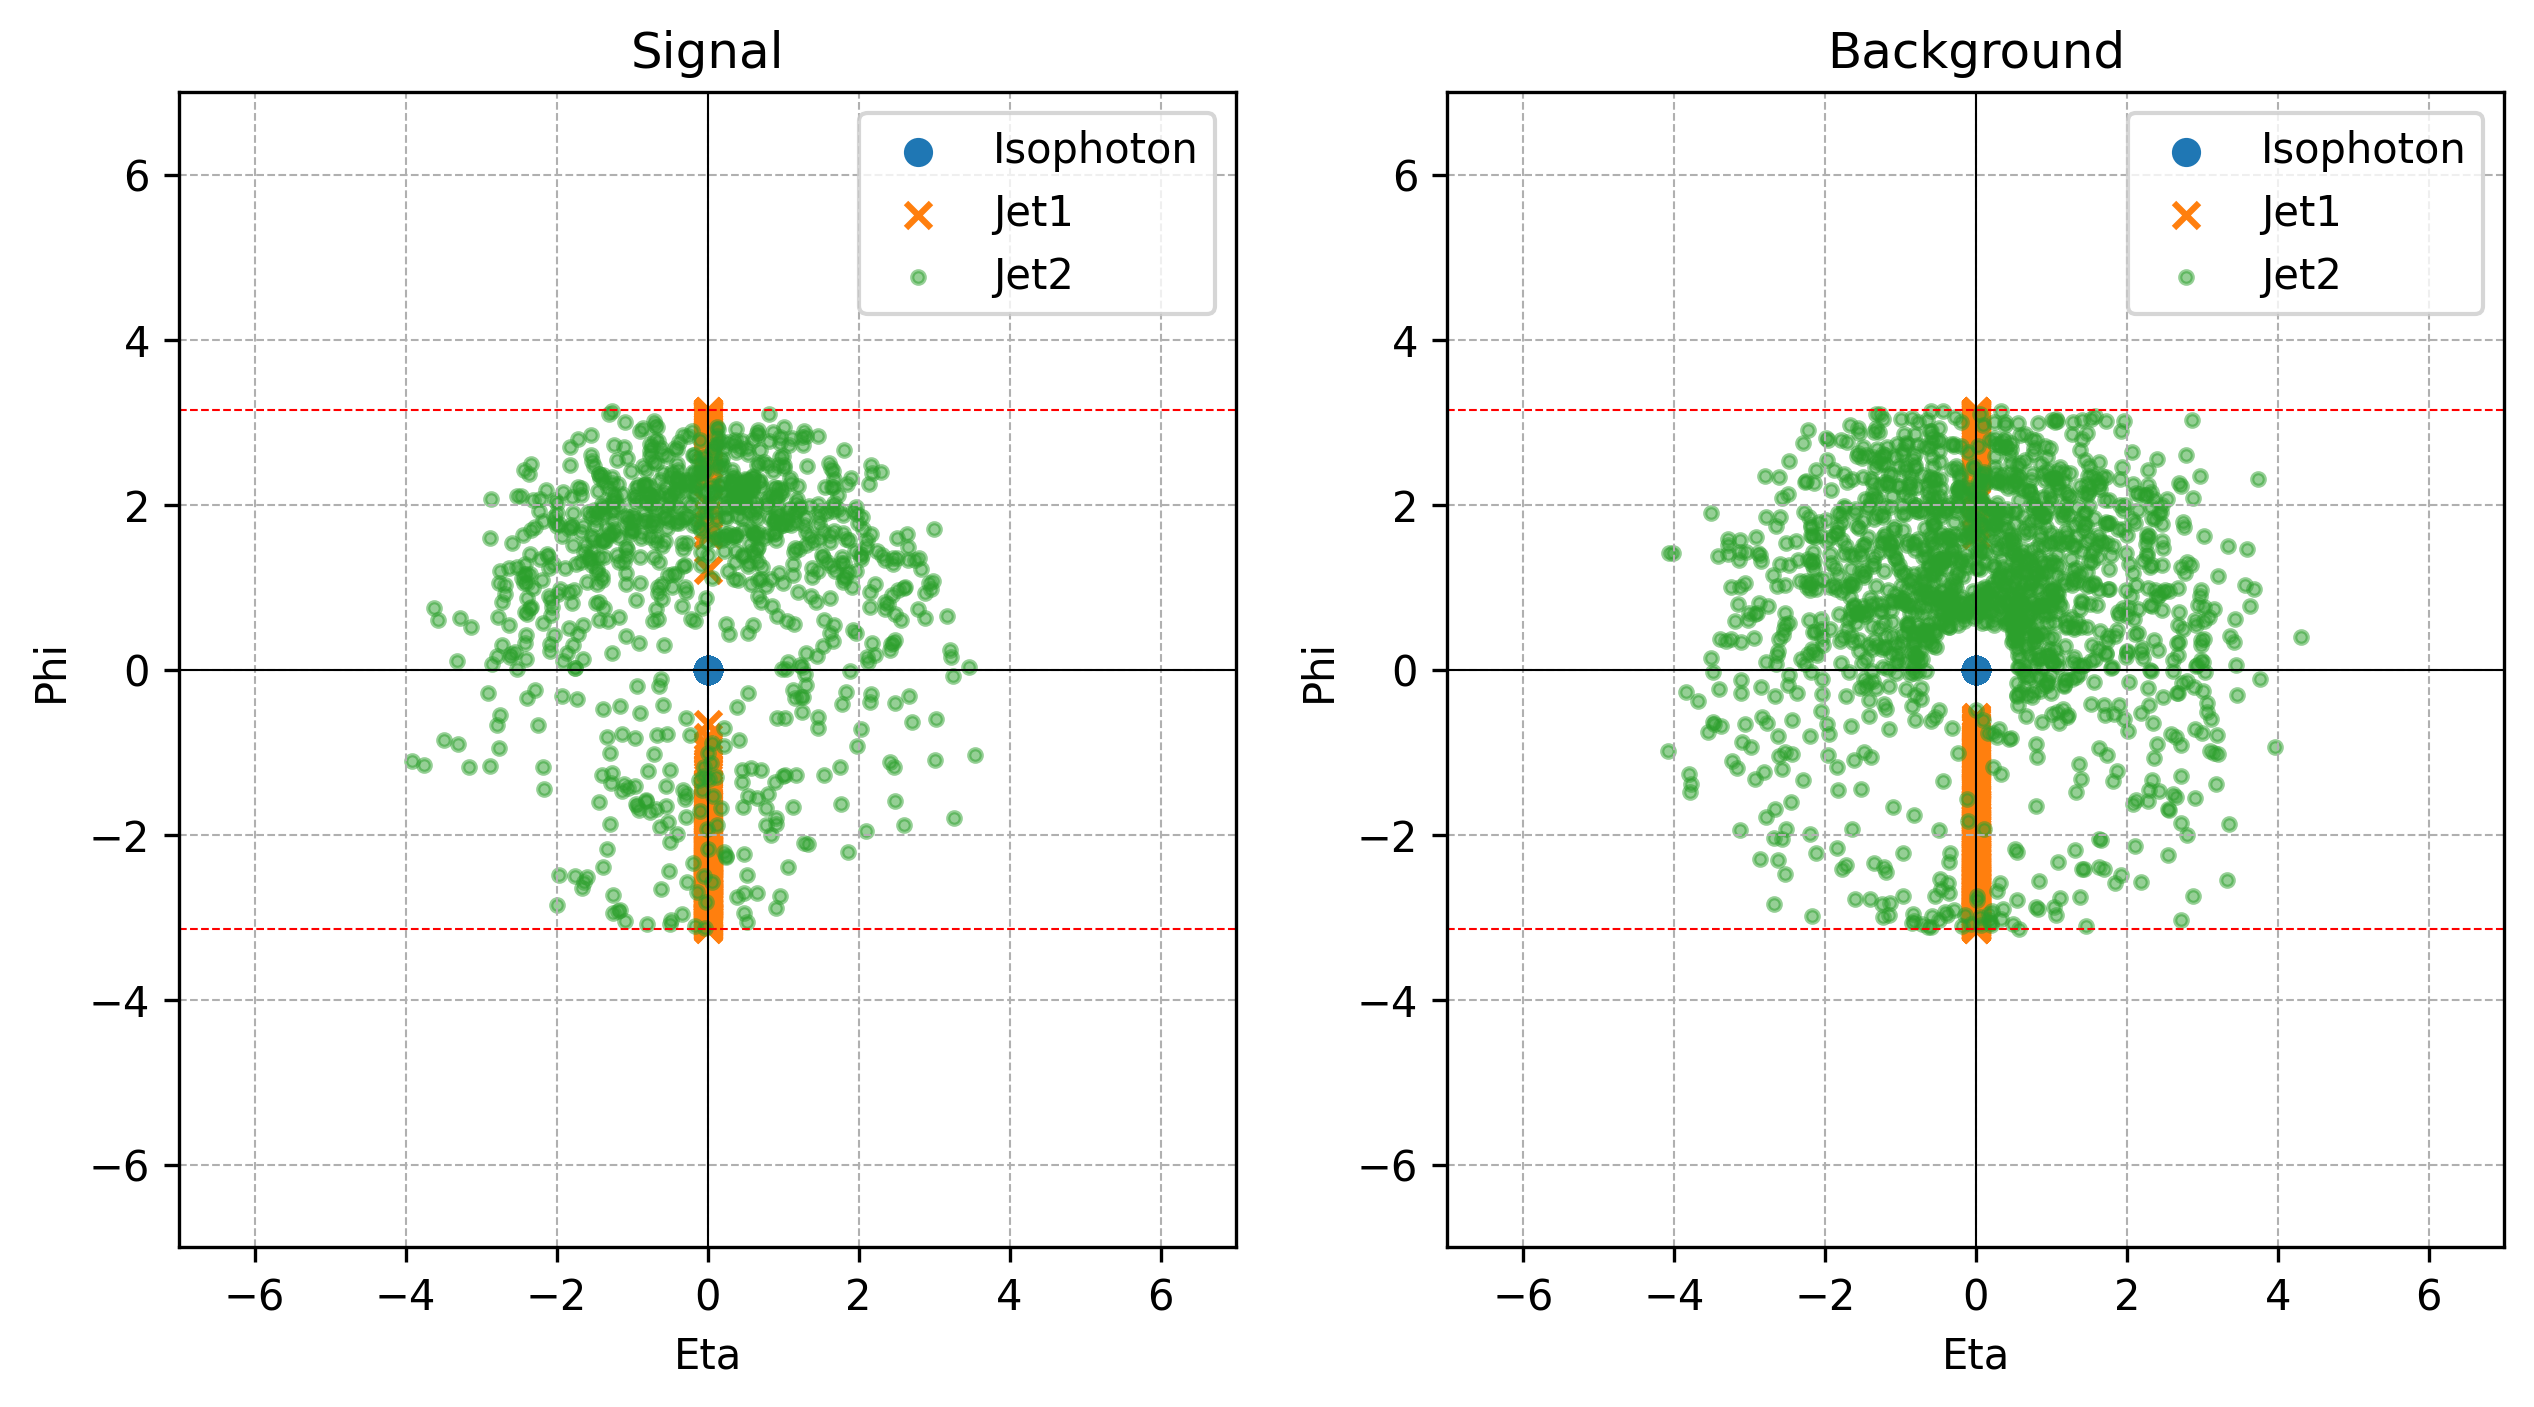

In [158]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi = 300)
processor.plot_all(signal_final,
                   axs[0], title = 'Signal')
processor.plot_all(background_final,
                   axs[1], title = 'Background')